**Train a neural network model to classify images of clothing, like sneakers and shirts. Use MNIST-Fashion data (https://github.com/zalandoresearch/fashion-mnist )**


**Experiment with different optimizers and loss functions. Which combination is best and explain it.**

In [ ]:
# Here we are importing the  libraries
from tensorflow.keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout ,Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras.optimizers import Adam ,Nadam ,Adamax,RMSprop ,Adagrad ,Adadelta,SGD
from keras import utils as np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time




In [ ]:
# to calculate accuracy
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset
(X_train, y_train), (X_test, y_test) =fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))


# Here we are taking categorical_crossentropy loss function
# 1. SGD Optimizer


In [ ]:
# Creating a blank list
result={}

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate=0.01))

# training the model for 10 epochs
start_time = time.time()
Result= model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

end_time = time.time()
training_time = end_time - start_time

loss,accurecy=model.evaluate(X_test,Y_test)
trainng_time = training_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 6s 6ms/step - loss: 0.8352 - accuracy: 0.7234 - val_loss: 0.6276 - val_accuracy: 0.7558
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5404 - accuracy: 0.8095 - val_loss: 0.5197 - val_accuracy: 0.8135
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4906 - accuracy: 0.8256 - val_loss: 0.4831 - val_accuracy: 0.8279
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4610 - accuracy: 0.8354 - val_loss: 0.4750 - val_accuracy: 0.8307
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4405 - accuracy: 0.8441 - val_loss: 0.4516 - val_accuracy: 0.8372
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4250 - accuracy: 0.8497 - val_loss: 0.4370 - val_accuracy: 0.8440
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4080 - accuracy: 0.8565 - val_loss: 0.4398 - val_accuracy: 0.8435
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_sgd = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.4250 - accuracy: 0.8471
test loss: 0.4249698221683502
test accuracy: 0.847100019454956


# 2. Adagrad Optimizer

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adagrad(learning_rate=0.001))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3544 - accuracy: 0.8744 - val_loss: 0.3898 - val_accuracy: 0.8627
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3505 - accuracy: 0.8765 - val_loss: 0.3863 - val_accuracy: 0.8628
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3482 - accuracy: 0.8768 - val_loss: 0.3849 - val_accuracy: 0.8639
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3456 - accuracy: 0.8771 - val_loss: 0.3805 - val_accuracy: 0.8636
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3435 - accuracy: 0.8779 - val_loss: 0.3828 - val_accuracy: 0.8629
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3411 - accuracy: 0.8803 - val_loss: 0.3793 - val_accuracy: 0.8642
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3396 - accuracy: 0.8802 - val_loss: 0.3768 - val_accuracy: 0.8657
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Adagrad = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.3749 - accuracy: 0.8671
test loss: 0.37494274973869324
test accuracy: 0.8671000003814697


# 3. RMSprop Optimizer

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.6376 - accuracy: 0.8164 - val_loss: 0.3626 - val_accuracy: 0.8697
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2984 - accuracy: 0.8909 - val_loss: 0.3061 - val_accuracy: 0.8902
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2483 - accuracy: 0.9086 - val_loss: 0.2804 - val_accuracy: 0.8964
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2152 - accuracy: 0.9203 - val_loss: 0.2915 - val_accuracy: 0.8953
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1899 - accuracy: 0.9298 - val_loss: 0.3170 - val_accuracy: 0.8937
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1692 - accuracy: 0.9383 - val_loss: 0.3234 - val_accuracy: 0.8876
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1516 - accuracy: 0.9452 - val_loss: 0.2896 - val_accuracy: 0.9001
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_RMSprop = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.9060
test loss: 0.29466739296913147
test accuracy: 0.906000018119812


# 4. Adadelta Optimizer

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.0836 - accuracy: 0.9728 - val_loss: 0.2915 - val_accuracy: 0.9067
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0808 - accuracy: 0.9739 - val_loss: 0.2894 - val_accuracy: 0.9072
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0789 - accuracy: 0.9748 - val_loss: 0.2881 - val_accuracy: 0.9073
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0775 - accuracy: 0.9754 - val_loss: 0.2873 - val_accuracy: 0.9073
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0764 - accuracy: 0.9759 - val_loss: 0.2867 - val_accuracy: 0.9075
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0755 - accuracy: 0.9762 - val_loss: 0.2864 - val_accuracy: 0.9086
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0748 - accuracy: 0.9765 - val_loss: 0.2861 - val_accuracy: 0.9089
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Adadelta= {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 3ms/step - loss: 0.2859 - accuracy: 0.9085
test loss: 0.28585654497146606
test accuracy: 0.9085000157356262


# 5. Adam Optimizer

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.1129 - accuracy: 0.9586 - val_loss: 0.3086 - val_accuracy: 0.9024
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.9679 - val_loss: 0.3242 - val_accuracy: 0.9084
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0788 - accuracy: 0.9721 - val_loss: 0.3197 - val_accuracy: 0.9104
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0685 - accuracy: 0.9754 - val_loss: 0.3448 - val_accuracy: 0.9079
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0538 - accuracy: 0.9819 - val_loss: 0.3832 - val_accuracy: 0.9065
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0472 - accuracy: 0.9836 - val_loss: 0.4021 - val_accuracy: 0.9082
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0426 - accuracy: 0.9852 - val_loss: 0.3884 - val_accuracy: 0.9109
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Adam = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.4493 - accuracy: 0.9065
test loss: 0.44932544231414795
test accuracy: 0.906499981880188


# 6. Adamax Optimizer

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.0105 - accuracy: 0.9977 - val_loss: 0.4478 - val_accuracy: 0.9126
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.4587 - val_accuracy: 0.9129
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.9994 - val_loss: 0.4749 - val_accuracy: 0.9132
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.4727 - val_accuracy: 0.9134
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 0.4867 - val_accuracy: 0.9120
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 0.5020 - val_accuracy: 0.9129
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.5086 - val_accuracy: 0.9152
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Adamax = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.9127
test loss: 0.5417360067367554
test accuracy: 0.9126999974250793


# 7. Nadam Optimizer

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result= model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.5664 - val_accuracy: 0.9053
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.5805 - val_accuracy: 0.9055
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.5909 - val_accuracy: 0.9099
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.5795 - val_accuracy: 0.9046
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.6244 - val_accuracy: 0.9068
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.5830 - val_accuracy: 0.9070
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.6454 - val_accuracy: 0.9065
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Nadam = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.6066 - accuracy: 0.9075
test loss: 0.6065592765808105
test accuracy: 0.9075000286102295


In [ ]:
rl=[result_sgd,result_Adadelta,result_Adagrad,result_Adam,result_Adamax,result_Nadam,result_RMSprop]
rl

[{'loss': 0.4249698221683502,
  'accuracy': 0.847100019454956,
  'training_time': 41.905850648880005},
 {'loss': 0.28585654497146606,
  'accuracy': 0.9085000157356262,
  'training_time': 24.226996183395386},
 {'loss': 0.37494274973869324,
  'accuracy': 0.8671000003814697,
  'training_time': 41.78247952461243},
 {'loss': 0.44932544231414795,
  'accuracy': 0.906499981880188,
  'training_time': 42.19788098335266},
 {'loss': 0.5417360067367554,
  'accuracy': 0.9126999974250793,
  'training_time': 41.873324394226074},
 {'loss': 0.6065592765808105,
  'accuracy': 0.9075000286102295,
  'training_time': 42.127540826797485},
 {'loss': 0.29466739296913147,
  'accuracy': 0.906000018119812,
  'training_time': 41.787986278533936}]

In [ ]:
df=pd.DataFrame(rl)
df

,loss,accuracy,training_time
0,0.424970,0.8471,41.905851
1,0.285857,0.9085,24.226996
2,0.374943,0.8671,41.782480
3,0.449325,0.9065,42.197881
4,0.541736,0.9127,41.873324
5,0.606559,0.9075,42.127541
6,0.294667,0.9060,41.787986


In [ ]:
df.describe()

,loss,accuracy,training_time
count,7.000000,7.000000,7.000000
mean,0.425437,0.893629,39.414580
std,0.119746,0.025706,6.699023
min,0.285857,0.847100,24.226996
25%,0.334805,0.886550,41.785233
50%,0.424970,0.906500,41.873324
75%,0.495531,0.908000,42.016696
max,0.606559,0.912700,42.197881


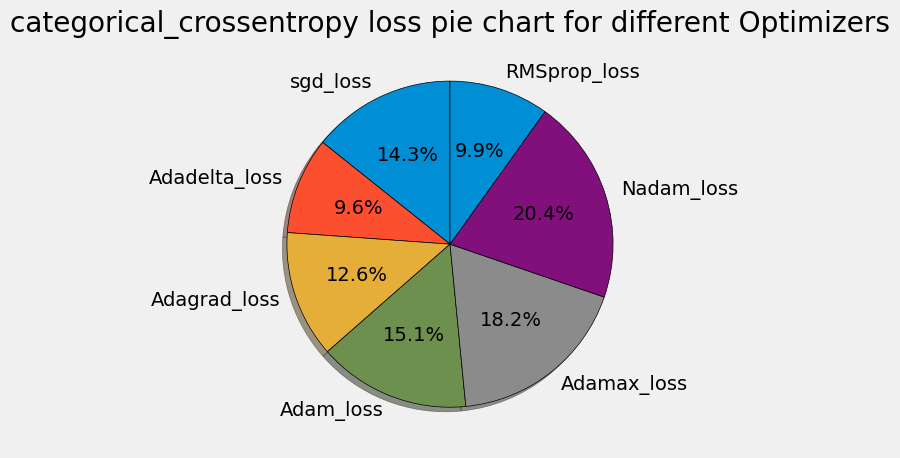

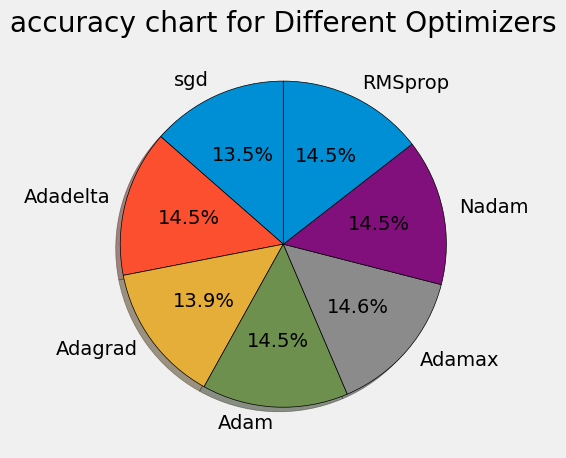

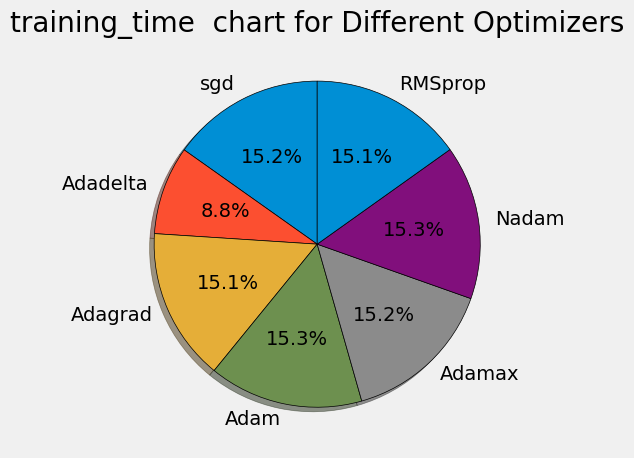

In [ ]:
from matplotlib import pyplot as plt

# Visualising categorical_crossentropy loss for above used optimisers
plt.style.use("fivethirtyeight")
optimizer = ["sgd_loss","Adadelta_loss","Adagrad_loss","Adam_loss","Adamax_loss","Nadam_loss","RMSprop_loss"]
plt.pie(df["loss"], labels=optimizer, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title("categorical_crossentropy loss pie chart for different Optimizers")
plt.tight_layout()
plt.show()

# Visualising Accuracy of each optimizer using categorical_crossentropy loss function
plt.style.use("fivethirtyeight")
optimizer = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
plt.pie(df["accuracy"], labels=optimizer, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("accuracy chart for Different Optimizers")
plt.tight_layout()
plt.show()


#Visualising Training time taking  each optimizer using categorical_crossentropy loss function
plt.style.use("fivethirtyeight")
optimizer = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
plt.pie(df["training_time"], labels=optimizer, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("training_time  chart for Different Optimizers")
plt.tight_layout()
plt.show()


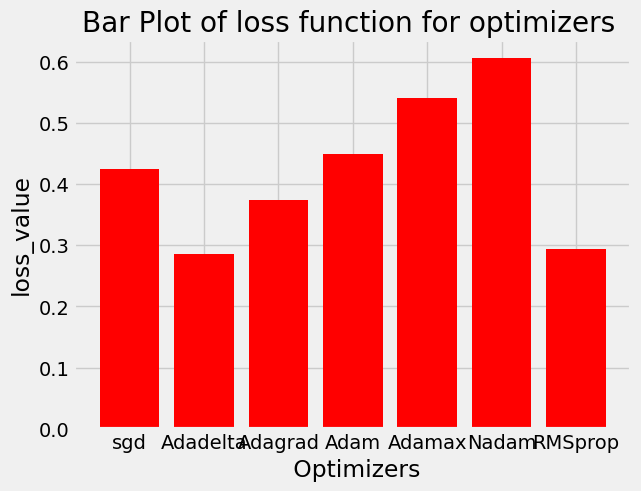

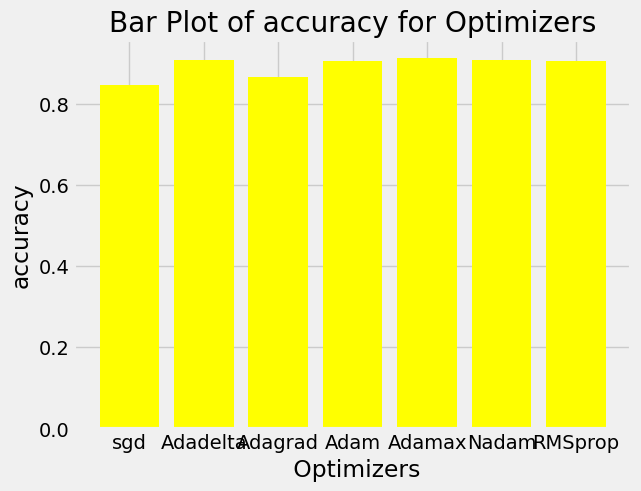

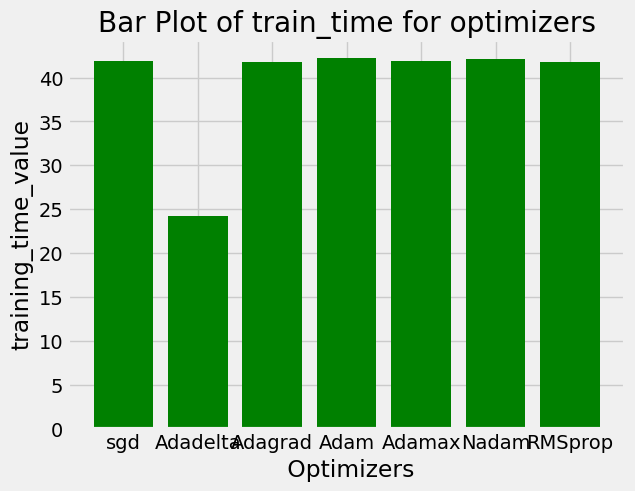

In [ ]:
# Bar plot
from matplotlib import pyplot as plt
x = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
# Creating the bar plot
plt.bar(x, df["loss"], color='red')

# Adding title and labels
plt.title('Bar Plot of loss function for optimizers ')
plt.xlabel(" Optimizers")
plt.ylabel('loss_value')

# Displaying the plot
plt.show()


x = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
# Creating the bar plot
plt.bar(x, df["accuracy"], color='yellow')

# Adding title and labels
plt.title('Bar Plot of accuracy for Optimizers')
plt.xlabel(" Optimizers")
plt.ylabel('accuracy')

# Displaying the plot
plt.show()


x = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
# Creating the bar plot
plt.bar(x, df["training_time"], color='green')

# Adding title and labels
plt.title('Bar Plot of train_time for optimizers')
plt.xlabel(" Optimizers")
plt.ylabel('training_time_value')

# Displaying the plot
plt.show()


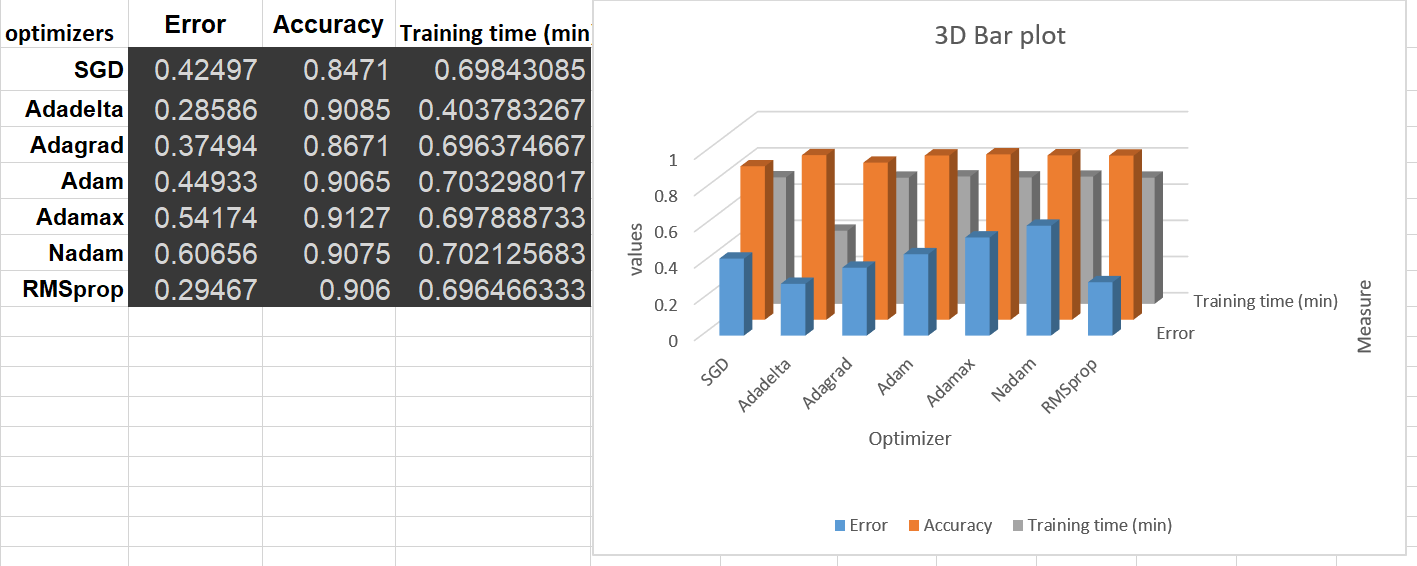

After visualisation we have seen that **Adadelta Optimizer** is taking **training time :24.226996** , and giving **Accuracy** on this Fashion MNIST dataset i.e. :     **0.9085** With **lowest loss : 0.285857** , When we are using the **categorical crossentropy loss function** .

 **Nadam optimiser** is taking **huge training time : 42.12754**   and giving **good accuracy: 0.9075**   on Fashion MNIST dataset but  with **highest loss : 0.606559**    from all other optimizers on using **categorical crossentropy loss function** for Fashion MNIST dataset

So After Analysing the dataframe table we have conclude that **Adadelta Optimizeris taking minimum train time , giving the better accuracy with minimun loss , when we comparing from other optimizers on using **categorical crossentropy loss function**
So  **Adadelta Optimizer** is better than other optimizer from other for Fashion MNIST dataset
And **Nadam optimizer** is performing very bad from other optimizers for Fashion MNIST dataset.

# ***Why is adadelta optimizer performing well from others optimizers for Fashion MNIST dataset?**


The performance of the AdaDelta optimizer performing well from others because it depends on main three parameters ,Which are the following:


**1) Learning Rate (lr)**: Although AdaDelta is an adaptive learning rate optimization algorithm and does not require an initial learning rate to be specified explicitly like traditional optimization methods, it still relies on a learning rate-like parameter. This parameter is used to control the step size in updating the parameters.

**2) Rho (ρ)**: This is the decay factor, often denoted as ρ (rho), which controls the accumulation of gradients over previous time steps. It's typically set to a value close to 1, such as 0.95 or 0.99. Higher values of ρ place more weight on recent gradients, whereas lower values allow for a larger historical gradient accumulation.

**3) Epsilon (ε)**: Epsilon is a small constant added to the denominator to prevent division by zero. It ensures numerical stability in the updates. Common values for ε are around 1e-8 or smaller.

It's designed to adaptively adjust the learning rates during training, making it less sensitive to manual tuning of hyperparameters.

So that it performs great from other optimizers for this classify images of clothes  Data set


# *** Why is Nadam optimizer performing well from others optimizer for Fashion MNIST dataset?***

ANS:   Because Sensitivity to Learning Rate ,Difficulty with High-Dimensional Spaces ,Unstable Training Dynamics ,Parameter Sensitivity ,Computation and Memory Requirements ,Need for Hyperparameter Tuning.
These are reason for Nadam optimizer is not performing well from others optimizers for Fashion MNIST dataset


# Here we are using binary crossentropy loss function

# 1) SGD Optimizer

In [ ]:
# Creating a blank list
result={}

In [ ]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=SGD(learning_rate=0.01))

# training the model for 10 epochs
start_time = time.time()
Result= model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

end_time = time.time()
training_time = end_time - start_time

loss,accurecy=model.evaluate(X_test,Y_test)
trainng_time = training_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0650 - accuracy: 0.9815 - val_loss: 0.1122 - val_accuracy: 0.9045
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0323 - accuracy: 0.9922 - val_loss: 0.0997 - val_accuracy: 0.9079
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0252 - accuracy: 0.9955 - val_loss: 0.0957 - val_accuracy: 0.9104
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0219 - accuracy: 0.9972 - val_loss: 0.0935 - val_accuracy: 0.9103
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0201 - accuracy: 0.9977 - val_loss: 0.0919 - val_accuracy: 0.9108
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9983 - val_loss: 0.0907 - val_accuracy: 0.9123
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0178 - accuracy: 0.9985 - val_loss: 0.0899 - val_accuracy: 0.9122
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_SGD = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9126
test loss: 0.08782315254211426
test accuracy: 0.9125999808311462


# 2. Adagrad


In [ ]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adagrad(learning_rate=0.001))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0158 - accuracy: 0.9988 - val_loss: 0.0877 - val_accuracy: 0.9127
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0157 - accuracy: 0.9988 - val_loss: 0.0876 - val_accuracy: 0.9124
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0155 - accuracy: 0.9989 - val_loss: 0.0875 - val_accuracy: 0.9126
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0154 - accuracy: 0.9990 - val_loss: 0.0874 - val_accuracy: 0.9124
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0153 - accuracy: 0.9990 - val_loss: 0.0872 - val_accuracy: 0.9122
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0152 - accuracy: 0.9990 - val_loss: 0.0870 - val_accuracy: 0.9129
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0151 - accuracy: 0.9990 - val_loss: 0.0870 - val_accuracy: 0.9130
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Adagrad = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9130
test loss: 0.08672574162483215
test accuracy: 0.9129999876022339


# 3. RMSprop

In [ ]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0118 - accuracy: 0.9989 - val_loss: 0.0802 - val_accuracy: 0.9164
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0079 - accuracy: 0.9994 - val_loss: 0.0831 - val_accuracy: 0.9156
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 0.0845 - val_accuracy: 0.9155
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.9996 - val_loss: 0.0895 - val_accuracy: 0.9147
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0042 - accuracy: 0.9998 - val_loss: 0.0927 - val_accuracy: 0.9167
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.0938 - val_accuracy: 0.9143
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 0.0979 - val_accuracy: 0.9162
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_RMSprop = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 3ms/step - loss: 0.1086 - accuracy: 0.9163
test loss: 0.10855726152658463
test accuracy: 0.9162999987602234


# 4. **Adadelta**

In [ ]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.9164
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 0.9162
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 0.9160
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 0.9159
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1089 - val_accuracy: 0.9161
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1089 - val_accuracy: 0.9161
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1090 - val_accuracy: 0.9161
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Adadelta = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.1090 - accuracy: 0.9165
test loss: 0.10904357582330704
test accuracy: 0.9164999723434448


# 5. Adam

In [ ]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.0054 - accuracy: 0.9977 - val_loss: 0.1086 - val_accuracy: 0.9140
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0037 - accuracy: 0.9984 - val_loss: 0.1088 - val_accuracy: 0.9130
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.1090 - val_accuracy: 0.9135
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 0.1084 - val_accuracy: 0.9140
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 0.1136 - val_accuracy: 0.9098
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.9986 - val_loss: 0.1188 - val_accuracy: 0.9117
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0024 - accuracy: 0.9988 - val_loss: 0.1220 - val_accuracy: 0.9105
Epoch 

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Adam = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.1282 - accuracy: 0.9089
test loss: 0.12818072736263275
test accuracy: 0.9089000225067139


# 6. Adamax

In [ ]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 5.4844e-04 - accuracy: 0.9999 - val_loss: 0.1251 - val_accuracy: 0.9129
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 2.3937e-04 - accuracy: 1.0000 - val_loss: 0.1267 - val_accuracy: 0.9126
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 1.8854e-04 - accuracy: 1.0000 - val_loss: 0.1288 - val_accuracy: 0.9127
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 1.5818e-04 - accuracy: 1.0000 - val_loss: 0.1312 - val_accuracy: 0.9130
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2983e-04 - accuracy: 1.0000 - val_loss: 0.1324 - val_accuracy: 0.9127
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 1.1135e-04 - accuracy: 1.0000 - val_loss: 0.1354 - val_accuracy: 0.9131
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 9.2395e-05 - accuracy: 1.0000 - val_loss: 0.1379 -

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Adamax = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.1440 - accuracy: 0.9129
test loss: 0.14403696358203888
test accuracy: 0.9128999710083008


# 7. Nadam

In [ ]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07))

# training the model for 10 epochs
start_time = time.time()
Result= model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
end_time = time.time()
training_time = end_time - start_time

print("The Model has Successfully Trained")
print("Training Time:", training_time, "seconds")

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.0013 - accuracy: 0.9993 - val_loss: 0.1433 - val_accuracy: 0.9097
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1454 - val_accuracy: 0.9072
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0021 - accuracy: 0.9987 - val_loss: 0.1420 - val_accuracy: 0.9133
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1543 - val_accuracy: 0.9121
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 0.1459 - val_accuracy: 0.9126
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 9.7714e-04 - accuracy: 0.9995 - val_loss: 0.1479 - val_accuracy: 0.9129
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 9.4249e-04 - accuracy: 0.9998 - val_loss: 0.1447 - val_accuracy: 0.914

In [ ]:
# Model evaluating
score = model.evaluate(X_test, Y_test, verbose=1)
print('test loss:', score[0])
print('test accuracy:', score[1])

# Calculate training time
training_time = end_time - start_time

# Define the values for 'loss' and 'accuracy' from 'score'
loss = score[0]
accuracy = score[1]

# Create or update a new dictionary with the computed values
result_Nadam = {'loss': loss, 'accuracy': accuracy, 'training_time': training_time}

313/313 [==============================] - 1s 2ms/step - loss: 0.1561 - accuracy: 0.9111
test loss: 0.1561008244752884
test accuracy: 0.9110999703407288


In [ ]:
rl=[result_sgd,result_Adadelta,result_Adagrad,result_Adam,result_Adamax,result_Nadam,result_RMSprop]
rl

[{'loss': 0.4249698221683502,
  'accuracy': 0.847100019454956,
  'training_time': 41.905850648880005},
 {'loss': 0.10904357582330704,
  'accuracy': 0.9164999723434448,
  'training_time': 41.924004793167114},
 {'loss': 0.08672574162483215,
  'accuracy': 0.9129999876022339,
  'training_time': 41.82729625701904},
 {'loss': 0.12818072736263275,
  'accuracy': 0.9089000225067139,
  'training_time': 41.90846347808838},
 {'loss': 0.14403696358203888,
  'accuracy': 0.9128999710083008,
  'training_time': 23.134244441986084},
 {'loss': 0.1561008244752884,
  'accuracy': 0.9110999703407288,
  'training_time': 42.12100052833557},
 {'loss': 0.10855726152658463,
  'accuracy': 0.9162999987602234,
  'training_time': 21.60200023651123}]

In [ ]:
bn=pd.DataFrame(rl)
bn

,loss,accuracy,training_time
0,0.424970,0.8471,41.905851
1,0.109044,0.9165,41.924005
2,0.086726,0.9130,41.827296
3,0.128181,0.9089,41.908463
4,0.144037,0.9129,23.134244
5,0.156101,0.9111,42.121001
6,0.108557,0.9163,21.602000


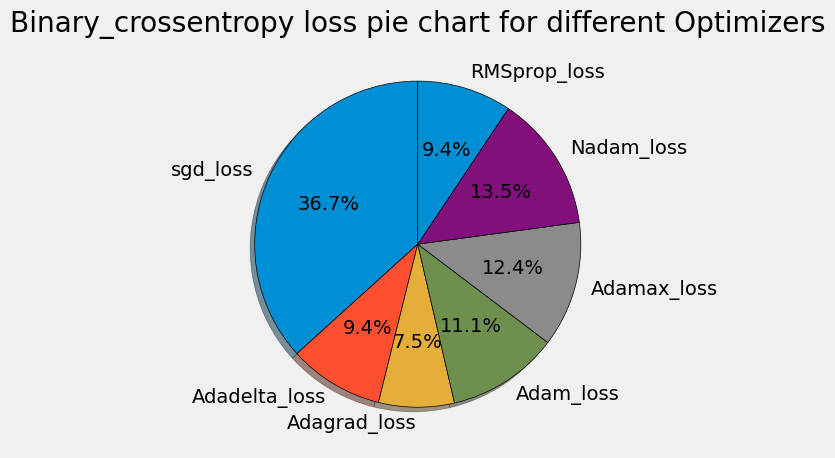

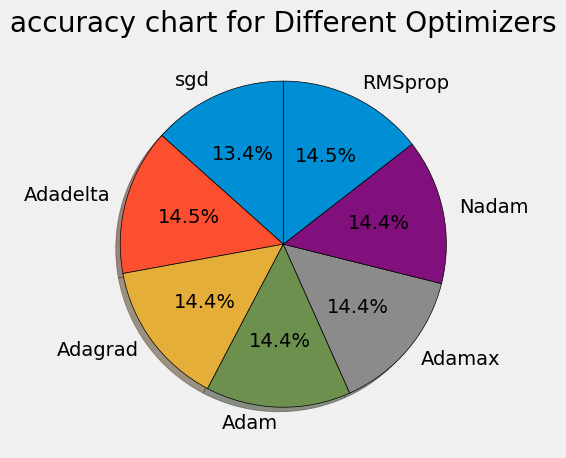

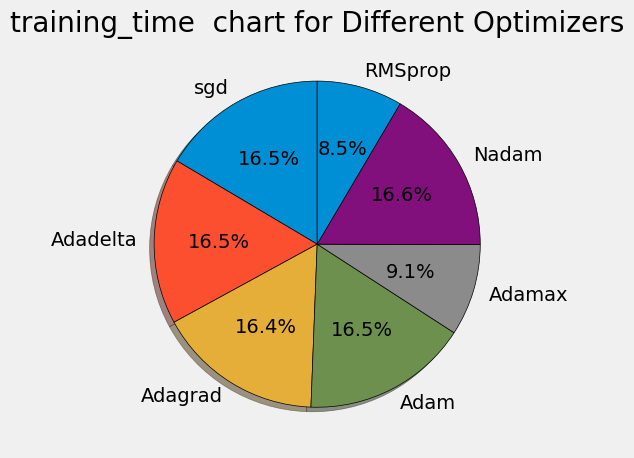

In [ ]:
from matplotlib import pyplot as plt

# Visualising Binary_crossentropy loss for above used optimisers
plt.style.use("fivethirtyeight")
optimizer = ["sgd_loss","Adadelta_loss","Adagrad_loss","Adam_loss","Adamax_loss","Nadam_loss","RMSprop_loss"]
plt.pie(bn["loss"], labels=optimizer, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title("Binary_crossentropy loss pie chart for different Optimizers")
plt.tight_layout()
plt.show()

# Visualising Accuracy of each optimizer using Binary_crossentropy loss function
plt.style.use("fivethirtyeight")
optimizer = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
plt.pie(bn["accuracy"], labels=optimizer, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("accuracy chart for Different Optimizers")
plt.tight_layout()
plt.show()


#Visualising Training time taking  each optimizer using Binary_crossentropy loss function
plt.style.use("fivethirtyeight")
optimizer = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
plt.pie(bn["training_time"], labels=optimizer, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("training_time  chart for Different Optimizers")
plt.tight_layout()
plt.show()


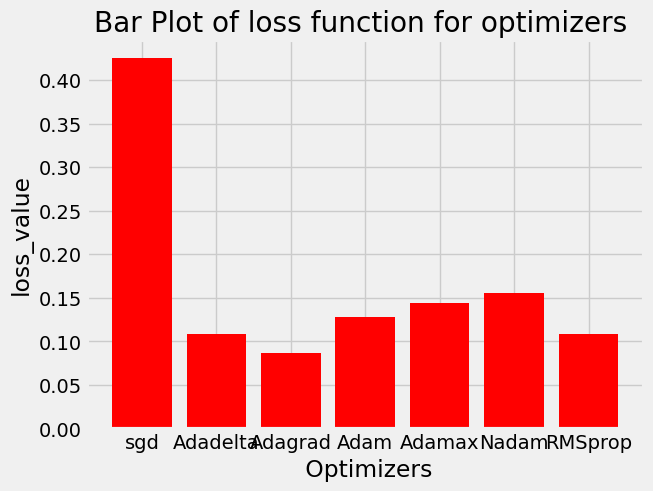

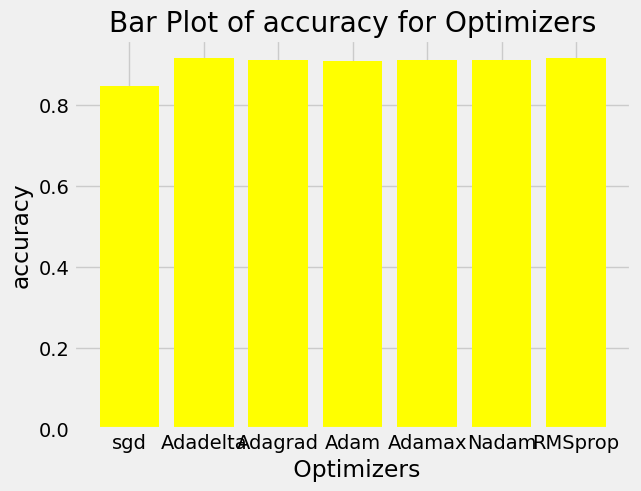

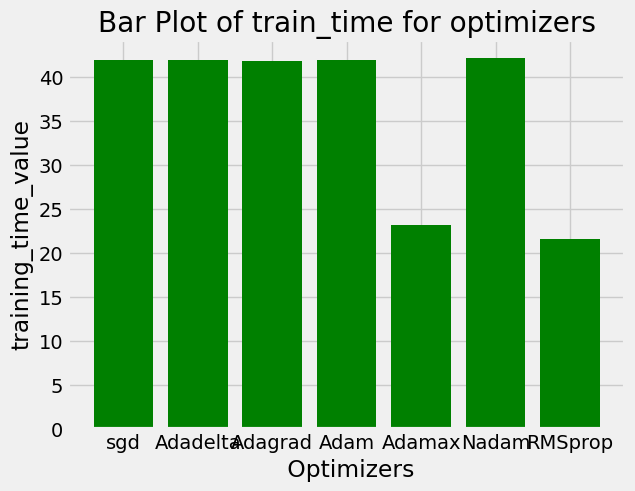

In [ ]:
# Bar plot
from matplotlib import pyplot as plt
x = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
# Creating the bar plot
plt.bar(x, bn["loss"], color='red')

# Adding title and labels
plt.title('Bar Plot of loss function for optimizers ')
plt.xlabel(" Optimizers")
plt.ylabel('loss_value')

# Displaying the plot
plt.show()


x = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
# Creating the bar plot
plt.bar(x, bn["accuracy"], color='yellow')

# Adding title and labels
plt.title('Bar Plot of accuracy for Optimizers')
plt.xlabel(" Optimizers")
plt.ylabel('accuracy')

# Displaying the plot
plt.show()


x = ["sgd","Adadelta","Adagrad","Adam","Adamax","Nadam","RMSprop"]
# Creating the bar plot
plt.bar(x, bn["training_time"], color='green')

# Adding title and labels
plt.title('Bar Plot of train_time for optimizers')
plt.xlabel(" Optimizers")
plt.ylabel('training_time_value')

# Displaying the plot
plt.show()


# Table and 3D Bar Plot for comparable visualisation



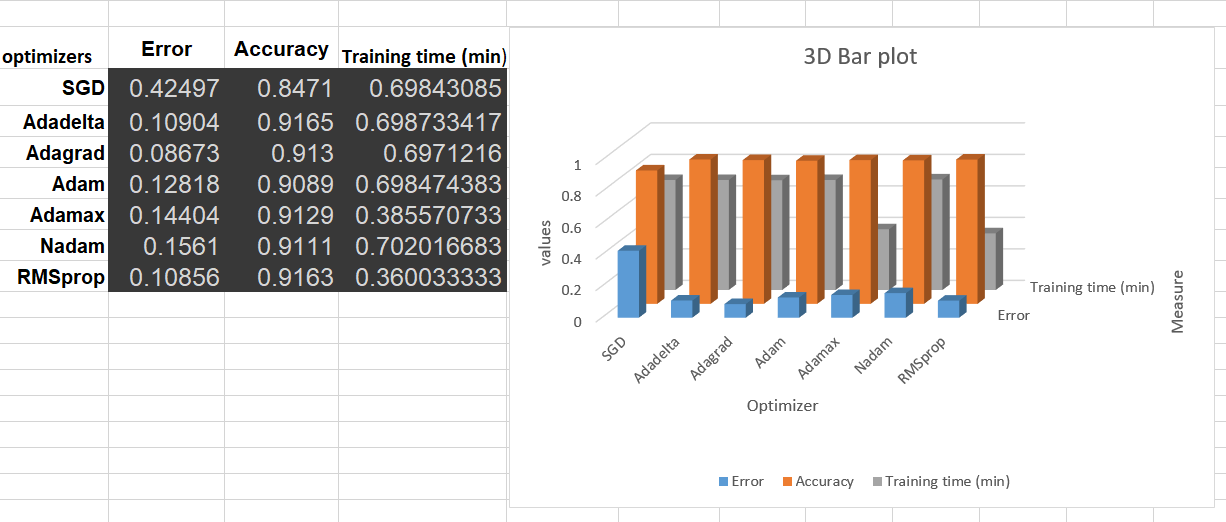







After visualisation we have seen that **Adagrad Optimizer** is taking **huge training time :41.827296** , but  giving **better accuracy on this  Fashion MNIST dataset i.e. : 0.9130 With lowest loss : 0.086726 **, When we are using the **Binary crossentropy loss function** .

 **SGD optimizer** is taking **highest training time :41.905851** and giving **very low accuracy:0.8471 **on Fashion MNIST dataset  **with highest loss : 0.424970** from all other optimizers on using **Binary crossentropy loss function**


So After Analysing the dataframe table we have concluded that Adagrad Optimizer is taking huge train time but giving the better accuracy with lowest loss , when we comparing from other optimizers on using **Binary crossentropy loss function for Fashion MNIST dataset  So **Adagrad Optimizer is better than other optimizer from other for Fashion MNIST dataset**. And SGD optimizer is performing very bad from other optimizers for Fashion MNIST dataset.

***Why is Adagrad Optimizer performing well from other optimizer for Fashion MNIST dataset?***

Ans: Because it dependes on Adaptive Learning Rates , Sparse Data Handling ,Automatic Scaling , No Manual Tuning of Learning Rates

***Why is
Stochastic Gradient Descent (SGD) Optimizer performing well from other optimizer for Fashion MNIST dataset?***

ANS : Slow Convergence , Sensitivity to Learning Rate ,Noisy Updates , No Momentum , Difficulty with Ill-conditioned Problems

# We have obseved that the combination of Adagrad and Binary crossentropy loss function is best comparable to the Adedelta and categorical crossentropy loss function